In [ ]:
import sys

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.cost = sys.maxsize


In [8]:


import numpy as np

class RandomMap:
    def __init__(self, size=50): 
        self.size = size
        self.obstacle = size//8 
        self.GenerateObstacle() 

    def GenerateObstacle(self):
        self.obstacle_point = []
        self.obstacle_point.append(Point(self.size//2, self.size//2))
        self.obstacle_point.append(Point(self.size//2, self.size//2-1))

        # Generate an obstacle in the middle
        for i in range(self.size//2-4, self.size//2): 
            self.obstacle_point.append(Point(i, self.size-i))
            self.obstacle_point.append(Point(i, self.size-i-1))
            self.obstacle_point.append(Point(self.size-i, i))
            self.obstacle_point.append(Point(self.size-i, i-1))

        for i in range(self.obstacle-1): 
            x = np.random.randint(0, self.size)
            y = np.random.randint(0, self.size)
            self.obstacle_point.append(Point(x, y))

            if (np.random.rand() > 0.5): # Random boolean ⑥
                for l in range(self.size//4):
                    self.obstacle_point.append(Point(x, y+l))
                    pass
            else:
                for l in range(self.size//4):
                    self.obstacle_point.append(Point(x+l, y))
                    pass

    def IsObstacle(self, i ,j): 
        for p in self.obstacle_point:
            if i==p.x and j==p.y:
                return True
        return False

In [ ]:
# a_star.py

import sys
import time

import numpy as np

from matplotlib.patches import Rectangle




class AStar:
    def __init__(self, map):
        self.map=map
        self.open_set = []
        self.close_set = []

    def BaseCost(self, p):
        x_dis = p.x
        y_dis = p.y
        # Distance to start point
        return x_dis + y_dis + (np.sqrt(2) - 2) * min(x_dis, y_dis)

    def HeuristicCost(self, p):
        x_dis = self.map.size - 1 - p.x
        y_dis = self.map.size - 1 - p.y
        # Distance to end point
        return x_dis + y_dis + (np.sqrt(2) - 2) * min(x_dis, y_dis)

    def TotalCost(self, p):
        return self.BaseCost(p) + self.HeuristicCost(p)

    def IsValidPoint(self, x, y):
        if x < 0 or y < 0:
            return False
        if x >= self.map.size or y >= self.map.size:
            return False
        return not self.map.IsObstacle(x, y)

    def IsInPointList(self, p, point_list):
        for point in point_list:
            if point.x == p.x and point.y == p.y:
                return True
        return False

    def IsInOpenList(self, p):
        return self.IsInPointList(p, self.open_set)

    def IsInCloseList(self, p):
        return self.IsInPointList(p, self.close_set)

    def IsStartPoint(self, p):
        return p.x == 0 and p.y ==0

    def IsEndPoint(self, p):
        return p.x == self.map.size-1 and p.y == self.map.size-1
    
    def RunAndSaveImage(self, ax, plt):
        start_time = time.time()

        start_point = Point(0, 0)
        start_point.cost = 0
        self.open_set.append(start_point)

        while True:
            index = self.SelectPointInOpenList()
            if index < 0:
                print('No path found, algorithm failed!!!')
                return
            p = self.open_set[index]
            rec = Rectangle((p.x, p.y), 1, 1, color='c')
            ax.add_patch(rec)
            self.SaveImage(plt)

            if self.IsEndPoint(p):
                return self.BuildPath(p, ax, plt, start_time)

            del self.open_set[index]
            self.close_set.append(p)

            # Process all neighbors
            x = p.x
            y = p.y
            self.ProcessPoint(x-1, y+1, p)
            self.ProcessPoint(x-1, y, p)
            self.ProcessPoint(x-1, y-1, p)
            self.ProcessPoint(x, y-1, p)
            self.ProcessPoint(x+1, y-1, p)
            self.ProcessPoint(x+1, y, p)
            self.ProcessPoint(x+1, y+1, p)
            self.ProcessPoint(x, y+1, p)
    
    def SaveImage(self, plt):
        millis = int(round(time.time() * 1000))
        filename = './fig/' + str(millis) + '.png'
        plt.savefig(filename)

    def ProcessPoint(self, x, y, parent):
        if not self.IsValidPoint(x, y):
            return # Do nothing for invalid point
        p = Point(x, y)
        if self.IsInCloseList(p):
            return # Do nothing for visited point
        print('Process Point [', p.x, ',', p.y, ']', ', cost: ', p.cost)
        if not self.IsInOpenList(p):
            p.parent = parent
            p.cost = self.TotalCost(p)
            self.open_set.append(p)

    def SelectPointInOpenList(self):
        index = 0
        selected_index = -1
        min_cost = sys.maxsize
        for p in self.open_set:
            cost = self.TotalCost(p)
            if cost < min_cost:
                min_cost = cost
                selected_index = index
            index += 1
        return selected_index

    def BuildPath(self, p, ax, plt, start_time):
        path = []
        while True:
            path.insert(0, p) # Insert first
            if self.IsStartPoint(p):
                break
            else:
                p = p.parent
        for p in path:
            rec = Rectangle((p.x, p.y), 1, 1, color='g')
            ax.add_patch(rec)
            plt.draw()
            self.SaveImage(plt)
        end_time = time.time()
        print('===== Algorithm finish in', int(end_time-start_time), ' seconds')

Process Point [ 1 , 0 ] , cost:  9223372036854775807
Process Point [ 1 , 1 ] , cost:  9223372036854775807
Process Point [ 0 , 1 ] , cost:  9223372036854775807
Process Point [ 0 , 2 ] , cost:  9223372036854775807
Process Point [ 0 , 1 ] , cost:  9223372036854775807
Process Point [ 1 , 0 ] , cost:  9223372036854775807
Process Point [ 2 , 0 ] , cost:  9223372036854775807
Process Point [ 2 , 1 ] , cost:  9223372036854775807
Process Point [ 2 , 2 ] , cost:  9223372036854775807
Process Point [ 1 , 2 ] , cost:  9223372036854775807
Process Point [ 1 , 3 ] , cost:  9223372036854775807
Process Point [ 1 , 2 ] , cost:  9223372036854775807
Process Point [ 2 , 1 ] , cost:  9223372036854775807
Process Point [ 3 , 1 ] , cost:  9223372036854775807
Process Point [ 3 , 2 ] , cost:  9223372036854775807
Process Point [ 3 , 3 ] , cost:  9223372036854775807
Process Point [ 2 , 3 ] , cost:  9223372036854775807
Process Point [ 2 , 4 ] , cost:  9223372036854775807
Process Point [ 2 , 3 ] , cost:  9223372036854

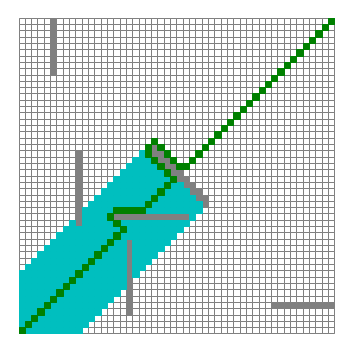

In [13]:
# main.py

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle



plt.figure(figsize=(5, 5))

map = RandomMap() 

ax = plt.gca()
ax.set_xlim([0, map.size]) 
ax.set_ylim([0, map.size])

for i in range(map.size): 
    for j in range(map.size):
        if map.IsObstacle(i,j):
            rec = Rectangle((i, j), width=1, height=1, color='gray')
            ax.add_patch(rec)
        else:
            rec = Rectangle((i, j), width=1, height=1, edgecolor='gray', facecolor='w')
            ax.add_patch(rec)

rec = Rectangle((0, 0), width = 1, height = 1, facecolor='b')
ax.add_patch(rec) 

rec = Rectangle((map.size-1, map.size-1), width = 1, height = 1, facecolor='r')
ax.add_patch(rec) 

plt.axis('equal') 
plt.axis('off')
plt.tight_layout()
#plt.show()

a_star = AStar(map)
a_star.RunAndSaveImage(ax, plt) 

In [15]:
import imageio
import glob
imageio.mimsave('./a_star.gif', [imageio.imread(f) for f in sorted(glob.glob('./a_star/*.png'))], fps=5)
